In [86]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs

In [87]:
x_row = np.load('random_aggr_450.npy')
x_random = np.load('row_aggr_450.npy')

X = np.append(x_row[:450], x_random, axis=0).reshape(900, 49)
y = np.append(np.ones(450) * -1, np.ones(450))

print(X.shape, y.shape)

(900, 49) (900,)


In [88]:
#  https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html
# φ(x,μ)=exp[–||x–μ||2 /σ2 ]
def my_kernel(x, mu):
    return np.exp(-np.square(x - mu) / np.square(5))

model = svm.NuSVC()
model.fit(X, y)

NuSVC()

In [89]:
y_pred = model.predict(X)

err = 0
for i, pred in enumerate(y_pred):
    if pred != y[i]:
        err += 1

print(f"Error: {err / len(y)}")

Error: 0.06


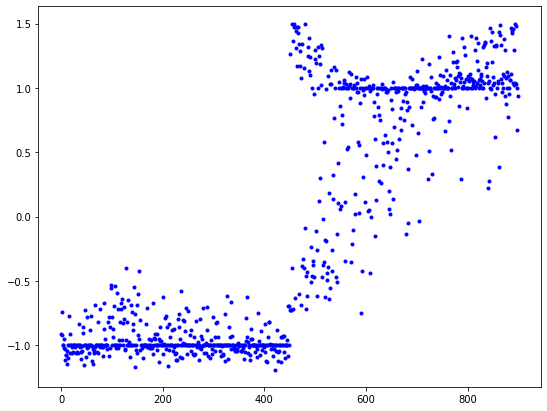

In [93]:
y_decision = model.decision_function(X)

fig, ax = plt.subplots(1, 1, figsize=(9,7))
ax.scatter(np.arange(0, len(y)), y_decision, marker='.', c="b")

plt.show()